In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

In [5]:
AGE_PROTO = "weights/deploy_age.prototxt"

AGE_MODEL = "weights/age_net.caffemodel"

AGE_INTERVALS = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)',
                 '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

age_net = cv2.dnn.readNetFromCaffe(AGE_PROTO, AGE_MODEL)


## Displaying an Image with its prediction using OpenCV

In [16]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def predict_age(image_path):

    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=10, minSize=(30,30))

    for i, (x,y,w,h) in enumerate(faces):
        face_image = image[y:y+h, x:x+w]

        blob = cv2.dnn.blobFromImage(
            image=face_image, scalefactor=1.0, size=(227,227), mean=MODEL_MEAN_VALUES, swapRB=False
        )

        age_net.setInput(blob)
        age_preds = age_net.forward()
        index = age_preds[0].argmax()
        age_conf = age_preds[0][index]
        age = AGE_INTERVALS[index]

        cv2.putText(image, f"AGE -- {age}", (x-40, y-20), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,5), 2)

        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

    cv2.imshow("Image", image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [20]:
predict_age("kid1.jpg")
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

## Displaying an Image with its prediction using Matplotlib

In [31]:
def predict_age_new(image_path):
    frame = cv2.imread(image_path)

    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=10, minSize=(30,30))

    fig, ax = plt.subplots(1)

    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    for i, (x,y,w,h) in enumerate(faces):
        rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor="g", facecolor="none")

        ax.add_patch(rect)

        blob = cv2.dnn.blobFromImage(frame[y:y+h, x: x+w], scalefactor=1.0, size=(227,227), mean=MODEL_MEAN_VALUES, swapRB=False)

        age_net.setInput(blob)
        age_preds = age_net.forward()
        index = age_preds[0].argmax()
        age = AGE_INTERVALS[index]

        ax.text(x, y-10, f"AGE -- {age}", fontsize=12, color="red")

    ax.set_axis_off()

    plt.show()

In [33]:
predict_age_new("adult.jpeg")

In [34]:
predict_age_new("adult4.jpeg")

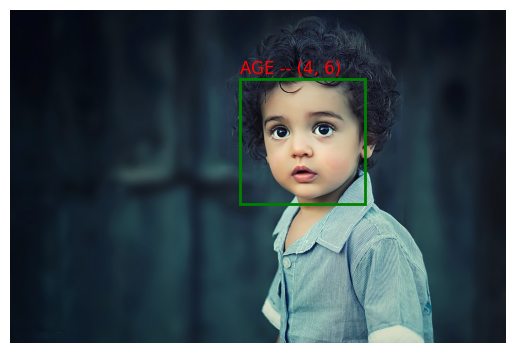

In [35]:
predict_age_new("kid1.jpg")

## Testing the Model on Live Camera

In [52]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")


camera = cv2.VideoCapture(0)

while camera.isOpened():
    success, frame = camera.read()

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30,30))

    for i, (x,y,w,h) in enumerate(faces):
        face = frame[y:y+h, x:x+w]

        blob = cv2.dnn.blobFromImage(face, scalefactor=1.0, size=(227,227), mean=MODEL_MEAN_VALUES, swapRB=False)

        age_net.setInput(blob)

        age_preds = age_net.forward()

        age = AGE_INTERVALS[age_preds[0].argmax()]

        cv2.putText(frame, f"AGE -- {age}", (x-40, y-40), cv2.FONT_HERSHEY_COMPLEX, 1, color=(0,255,0), thickness=2)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


[hevc @ 0x13770a140] PPS id out of range: 0
[hevc @ 0x13770a140] PPS id out of range: 0
[hevc @ 0x107eee380] Could not find ref with POC 12


-1